In [72]:
# import packages and libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("online_shoppers_intention.csv")

In [38]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Data preprocessing

In [39]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [41]:
for column in data.columns:
    print(data[column].value_counts())

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informati

In [42]:
## features and target variables
features = list(data.columns)
for i in ["Weekend", "Revenue", "Informational_Duration"]:
    features.remove(i)
target_weekend = "Weekend"
target_revenue = "Revenue"
target_id = "Informational_Duration"

In [33]:
cat_features= []
for fea in features:
    if len(data[fea].value_counts())<20:
        cat_features.append(fea)
cat_features

['Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'VisitorType']

In [44]:
# Applyng label encoding to "Month" feature as it has ordinal relationship
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data["Month"])
data["Month"] = le.transform(data["Month"])
    
# Now apply either onE hot encoding or create varibales for rest of the other categorical type features as they do not ahve any ordinal relationship    
#from sklearn.preprocessing import OneHotEncoder

for i in cat_features:
    if i =="Month":
        continue
    data = pd.get_dummies(data, columns =[i])    ##here i used the feature in `[]`, because, this function accept "columns" arguement vakue as a list of features on which one hot encoding to be applied, so we gave even the one feature as a list 

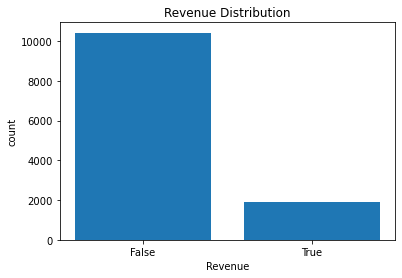

In [62]:
## Distribution of "Revenue" feature

# Create the bar plot
plt.bar(list(data[target_revenue].unique()), list(data[target_revenue].value_counts()))

# Add labels and title
plt.xticks(range(2), list(data[target_revenue].unique()))  # to add the features categories

plt.xlabel('Revenue')
plt.ylabel('count')
plt.title('Revenue Distribution')

# Display the plot
plt.show()

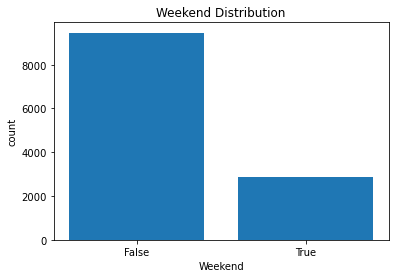

In [64]:
## Distribution of "Weekend" feature

# Create the bar plot
plt.bar(list(data[target_weekend].unique()), list(data[target_weekend].value_counts()))

# Add labels and title
plt.xticks(range(2), list(data[target_weekend].unique()))  # to add the features categories

plt.xlabel('Weekend')
plt.ylabel('count')
plt.title('Weekend Distribution')

# Display the plot
plt.show()

In [70]:
## features and target variables
features = list(data.columns)
for i in ["Weekend", "Revenue", "Informational_Duration"]:
    features.remove(i)
target_weekend = "Weekend"
target_revenue = "Revenue"
target_id = "Informational_Duration"

In [74]:
# Splitting data into train and test sets
X = data[features]
y_weekend = data[target_weekend]
y_revenue = data[target_revenue]
y_id = data[target_id]

X_train, X_test, y_weekend_train, y_weekend_test, y_revenue_train, y_revenue_test, y_id_train, y_id_test  = train_test_split(X, y_weekend, y_revenue, y_id, test_size=0.2, random_state = 42)

### Model train (with handling data imbalance)

In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report,accuracy_score

#gives model report in dataframe
def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    
    predictions  = model.predict(testing_x)
    
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [88]:
# Applying Radom Forest classifier to "Revenue"
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")

modelrf_revenue = model_report(forest_model,X_train,y_revenue_train,X_test,y_revenue_test, "Random Forest")
modelrf_revenue

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.884023,0.396594,0.810945,0.53268,0.689051,0.475229


In [89]:
# Applying Radom Forest classifier to "Weekend"
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")

modelrf_weekend = model_report(forest_model,X_train,y_weekend_train,X_test,y_weekend_test, "Random Forest")
modelrf_weekend

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.764801,0.064516,1.0,0.121212,0.532258,0.093589


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_id_train)

y_pred = forest_model.predict(X_test)

mse = mean_squared_error(y_id_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 14902.743874875781


## Performing sampling techniques to balance the data

In [ ]:
X_train, X_test, y_weekend_train, y_weekend_test, y_revenue_train, y_revenue_test, y_id_train, y_id_test

In [86]:
## Random oversampler

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_resampled_weekend, y_weekend_resampled = oversample.fit_resample(X_train, y_weekend_train)
X_resampled_revenue, y_revenue_resampled = oversample.fit_resample(X_train, y_revenue_train)

In [91]:
# Applying Radom Forest classifier to "Revenue"c after handling imbalance data

forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")

modelrfs_revenue = model_report(forest_model,X_resampled_revenue,y_revenue_resampled,X_test,y_revenue_test, "Random Forest")
modelrfs_revenue

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.868613,0.815085,0.574614,0.674044,0.847202,0.594831


In [92]:
# Applying Radom Forest classifier to "Weekend" after handling imbalnace data
forest_model = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 9,
                             criterion = "gini")

modelrfs_weekend = model_report(forest_model,X_resampled_weekend,y_weekend_resampled,X_test,y_weekend_test, "Random Forest")
modelrfs_weekend

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Random Forest,0.605434,0.595161,0.338222,0.431327,0.602023,0.162941
